LOCATION SPECIFIC CRIME ANALYSIS USING CLUSTERING AND CLASSIFICATION TECHNIQUES


Import Libraries



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import an read data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/kmeans

/content/drive/MyDrive/kmeans


In [ ]:
df = pd.read_csv("boston_crime.csv",encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


 Multi classification
Y - DISTRICT

X - 'REPORTING_AREA','MONTH','DAY_OF_WEEK', 'HOUR','Lat','Long', 'OFFENSE_CODE_GROUP','Day','Night'

In [ ]:
df['Day'] = 0
df['Night'] = 0

In [ ]:
# Day or night for 1st month
df['Day'].loc[(df['MONTH'] == 1) & (df['HOUR'] >= 6) & (df['HOUR'] <= 18)] = 1
# Day or night for 2st month
df['Day'].loc[(df['MONTH'] == 2) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1
# for 3st month
df['Day'].loc[(df['MONTH'] == 3) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1
# Day or night for 4st month
df['Day'].loc[(df['MONTH'] == 4) & (df['HOUR'] >= 5) & (df['HOUR'] <= 20)] = 1
# Day or night for 5st month
df['Day'].loc[(df['MONTH'] == 5) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1
# Day or night for 6st month
df['Day'].loc[(df['MONTH'] == 6) & (df['HOUR'] >= 4) & (df['HOUR'] <= 21)] = 1
# Day or night for 7st month
df['Day'].loc[(df['MONTH'] == 7) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1
# Day or night for 8st month
df['Day'].loc[(df['MONTH'] == 8) & (df['HOUR'] >= 5) & (df['HOUR'] <= 21)] = 1
# Day or night for 9st month
df['Day'].loc[(df['MONTH'] == 9) & (df['HOUR'] >= 6) & (df['HOUR'] <= 20)] = 1
# Day or night for 10st month
df['Day'].loc[(df['MONTH'] == 10) & (df['HOUR'] >= 6) & (df['HOUR'] <= 19)] = 1
# Day or night for 11st month
df['Day'].loc[(df['MONTH'] == 11) & (df['HOUR'] >= 6) & (df['HOUR'] <= 17)] = 1
# Day or night for 12st month
df['Day'].loc[(df['MONTH'] == 12) & (df['HOUR'] >= 7) & (df['HOUR'] <= 17)] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['Night'].loc[df['Day']==0]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_model = pd.DataFrame()

In [ ]:
df_model=df[['REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','OFFENSE_CODE_GROUP','Day','Night','DISTRICT']]

In [ ]:
df_model['DISTRICT']

0         E18
1         D14
2          B2
3          A1
4          A7
         ... 
327815     D4
327816    E18
327817    E18
327818    E13
327819     D4
Name: DISTRICT, Length: 327820, dtype: object

Dropping Null values


In [ ]:
df_model = df_model.dropna()

In [ ]:
df_model.fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X = df_model.values[:, 0:9]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,2] = le.fit_transform(X[:,2])
X[:,6] = le.fit_transform(X[:,6])
y = df_model['DISTRICT']

In [ ]:
y.fillna(0, inplace = True)

In [ ]:
y = y.map({'B3':1, 'E18':2, 'B2':3,  'E5':4,  'C6':5,  'D14':6, 'E13':7, 'C11':8, 'D4':9, 'A7':10, 'A1':11, 'A15':12,0:1})
f1={'B3':1, 'E18':2, 'B2':3,  'E5':4,  'C6':5,  'D14':6, 'E13':7, 'C11':8, 'D4':9, 'A7':10, 'A1':11, 'A15':12,0:1}

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(275137, 9) (275137,)
(30571, 9) (30571,)


Classification model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
def fun_RandomForestClassifier(X_train, Y_train):
    f=[]
    rfc = RandomForestClassifier()
    rfc = rfc.fit(X_train, Y_train)
    print("'REPORTING AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','OFFENSE_CODE_GROUP','Day','Night','DISTRICT'")
    print("Input values in format 598 12 4 13 42.31624019 -71.11267011 61 1 0")
    for _ in range(9):
      f.append(int(input()))
    rf=rfc.predict([f])
    for i in f1:
      if f1[i]==rf:
        print("The probablity of crime may occur in district",i)
    rfc_pred = rfc.predict(X_test)

    rfc_score = f1_score(Y_test, rfc_pred, average=None)
    #print(rfc_score)
    #print(rfc_pred)

fun_RandomForestClassifier(X_train, Y_train)

'REPORTING AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','OFFENSE_CODE_GROUP','Day','Night','DISTRICT'
Input values in format 598 12 4 13 42.31624019 -71.11267011 61 1 0
597
3
4
12
78
-75
62
0
1
The probablity of crime may occur in district E13


Clustering with location and OFFENSE_CODE

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_clus = df[['OFFENSE_CODE','MONTH','Long','Lat']]

In [ ]:
df_clus = df_clus.loc[(df_clus['Lat'] > 40) & (df_clus['Long'] < -60)]

df_clus = df_clus.dropna()
df_clus.describe()

,OFFENSE_CODE,MONTH,Long,Lat
count,306413.000000,306413.000000,306413.000000,306413.000000
mean,2296.613835,6.674469,-71.082841,42.322292
std,1182.763063,3.258638,0.029744,0.031859
min,111.000000,1.000000,-71.178674,42.232413
25%,802.000000,4.000000,-71.097189,42.297555
50%,2907.000000,7.000000,-71.077550,42.325646
75%,3201.000000,9.000000,-71.062563,42.348624
max,3831.000000,12.000000,-70.963676,42.395042


In [ ]:
X = df_clus
X = X[~np.isnan(X)]

In [ ]:
X

,OFFENSE_CODE,MONTH,Long,Lat
0,2403,10,-71.121186,42.262608
1,3201,8,-71.135311,42.352111
2,2647,10,-71.076930,42.308126
3,413,10,-71.059648,42.359454
4,3122,10,-71.024663,42.375258
...,...,...,...,...
327815,3125,6,-71.085748,42.336951
327816,111,7,-71.123172,42.255926
327817,3125,7,-71.123172,42.255926
327818,3125,5,-71.111565,42.302333


In [ ]:
def doKmeans(X, nclust):
    arr=[]
    model = KMeans(nclust)
    model.fit(X)

    clust_labels = model.predict(X)
    print("'OFFENSE_CODE','MONTH','Long','Lat'")
    print("Input values in format 3122,10,-71.024663,42.375258")
    for _ in range(4):
      arr.append(int(input()))
    f=model.predict([arr])
    cent = model.cluster_centers_
    print("This crime belongs to cluster",f)
    print("Look for its character and analyse crime")
    
    return (clust_labels, cent)
    

clust_labels, cent = doKmeans(X, 10)
kmeans = pd.DataFrame(clust_labels)

'OFFENSE_CODE','MONTH','Long','Lat'
Input values in format 3122,10,-71.024663,42.375258
3124
12
45
-42
This crime belongs to cluster [8]
Look for its character and analyse crime


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


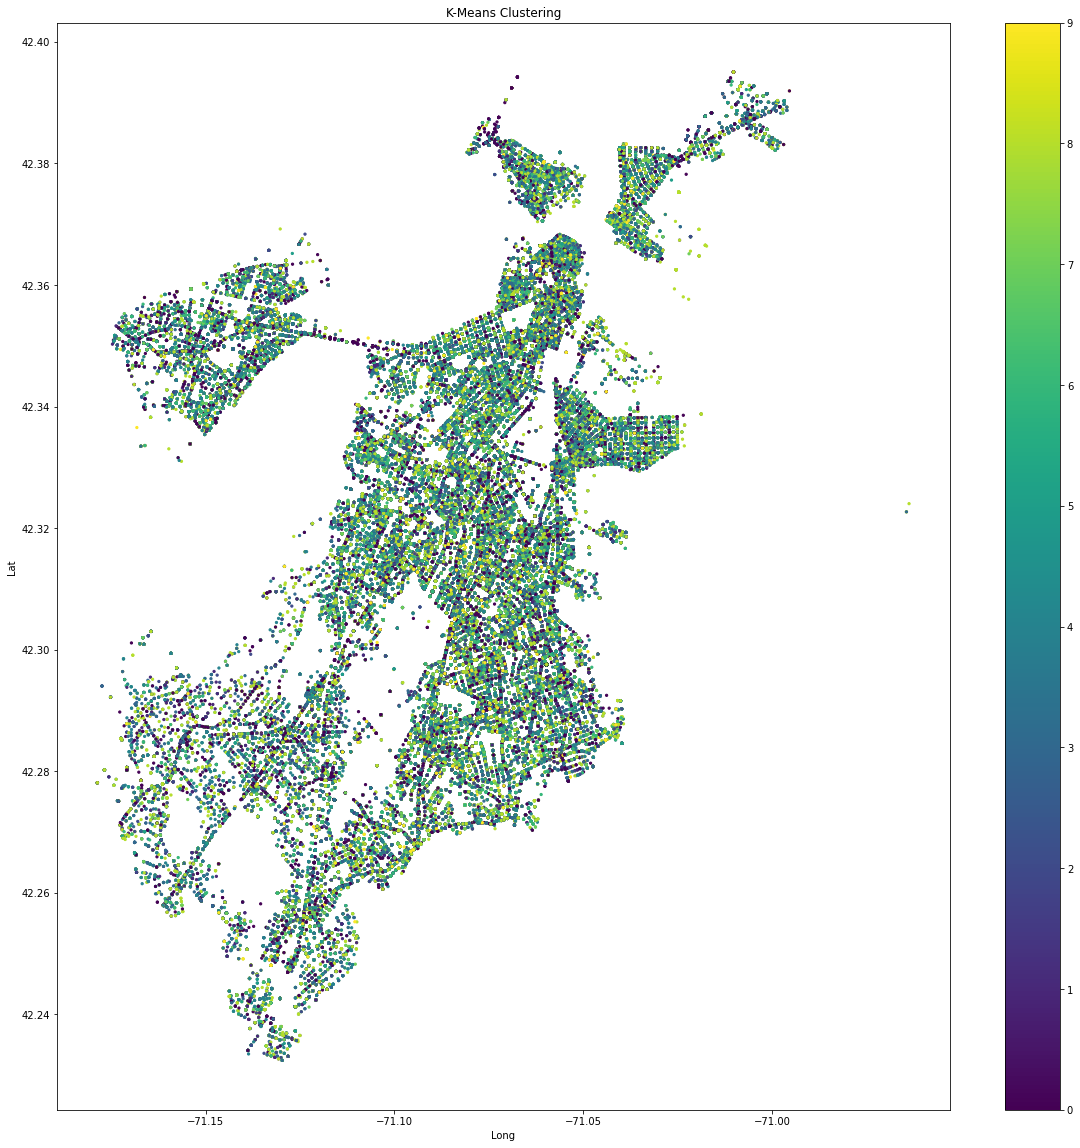

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=5)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

In [ ]:
tab=pd.DataFrame()
tab=df_clus
tab['cluster']=clust_labels

In [ ]:
tab


,OFFENSE_CODE,MONTH,Long,Lat,cluster
0,2403,10,-71.121186,42.262608,2
1,3201,8,-71.135311,42.352111,8
2,2647,10,-71.076930,42.308126,2
3,413,10,-71.059648,42.359454,9
4,3122,10,-71.024663,42.375258,8
...,...,...,...,...,...
327815,3125,6,-71.085748,42.336951,8
327816,111,7,-71.123172,42.255926,9
327817,3125,7,-71.123172,42.255926,8
327818,3125,5,-71.111565,42.302333,8


In [ ]:
tab.loc[tab['cluster'] == 8]

,OFFENSE_CODE,MONTH,Long,Lat,cluster
1,3201,8,-71.135311,42.352111,8
4,3122,10,-71.024663,42.375258,8
13,3115,10,-71.087983,42.279865,8
18,3115,10,-71.099377,42.342681,8
19,3108,10,-71.062131,42.309988,8
...,...,...,...,...,...
327814,3125,1,-71.100967,42.322838,8
327815,3125,6,-71.085748,42.336951,8
327817,3125,7,-71.123172,42.255926,8
327818,3125,5,-71.111565,42.302333,8
